In [69]:
#IMPORTING THE LIBRARIES

import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [19]:
#READING THE DATASET

match_data=pd.read_csv("matches.csv")
match_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [20]:
#CHECKING FOR NULL VALUES

match_data.isna().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [21]:
#CREATING A SUBSET OF THE MAIN DATASET WITH ONLY THE REQUIRED COLUMNS

data=match_data[['id','season','city','team1','team2','toss_winner','toss_decision','winner','win_by_runs','win_by_wickets','venue']]
data

,id,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,0,9,Wankhede Stadium
752,11412,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians,0,6,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,0,2,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,0,6,ACA-VDCA Stadium


In [22]:
#CHECKING FOR NULL VALUE IN NEW DATASET

data.isna().sum()

id                0
season            0
city              0
team1             0
team2             0
toss_winner       0
toss_decision     0
winner            4
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [23]:
#REPLACING NULL VALUES 

data['winner'].fillna("Draw",inplace=True)

/var/folders/_c/_vx6sphn1m76py3b5mx1jh340000gn/T/ipykernel_20848/1597333361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['winner'].fillna("Draw",inplace=True)


In [24]:
#CHECKING FOR UNIQUE TEAMS

data.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [25]:
#CHECKING FOR UNIQUE TEAMS

data.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [26]:
#REPLACING THE SAME VALUES UNDER DIFFERENT LABELS

data.replace("Deccan Chargers","Sunrisers Hyderabad",inplace=True)
data.replace("Delhi Daredevils","Delhi Capitals",inplace=True)
data.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)

/var/folders/_c/_vx6sphn1m76py3b5mx1jh340000gn/T/ipykernel_20848/4264225520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("Deccan Chargers","Sunrisers Hyderabad",inplace=True)
/var/folders/_c/_vx6sphn1m76py3b5mx1jh340000gn/T/ipykernel_20848/4264225520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("Delhi Daredevils","Delhi Capitals",inplace=True)
/var/folders/_c/_vx6sphn1m76py3b5mx1jh340000gn/T/ipykernel_20848/4264225520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [27]:
#CHECKING AFTER REPLACEMENT

data.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

In [28]:
#CHECKING AFTER REPLACEMENT

data.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [29]:
data1=data[['id','season','city','team1','team2','toss_winner','winner','win_by_runs','win_by_wickets','venue']]
data1

,id,season,city,team1,team2,toss_winner,winner,win_by_runs,win_by_wickets,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,Rising Pune Supergiants,0,7,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,0,10,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab,0,6,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,15,0,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Mumbai Indians,0,9,Wankhede Stadium
752,11412,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,Mumbai Indians,0,6,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,Delhi Capitals,0,2,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,0,6,ACA-VDCA Stadium


<AxesSubplot:>

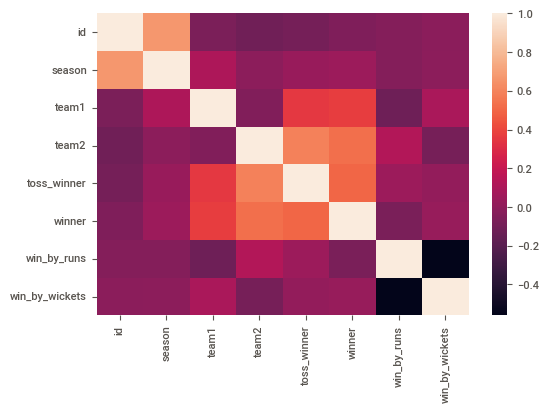

In [134]:
#CHECKING CORRELATION

sns.heatmap(data.corr())

In [30]:
#EDA DONE USING THE SWEETVIZ LIBRARY

eda=sv.analyze(data1)
eda.show_html("eda.html")


                                             |      | [  0%]   00:00 -> (? left)

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
#ENCODING THE CATEGORICAL DATA INTO NUMERICAL VALUES


data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC", 
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR", 
               "Kolkata Knight Riders":"KKR", "Kings XI Punjab":"KXIP", 
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Lions":"GL", "Pune Warriors":"PW"}, inplace=True)

encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'toss_winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
          'winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12,'Draw':13}}
data.replace(encode, inplace=True)
data

/var/folders/_c/_vx6sphn1m76py3b5mx1jh340000gn/T/ipykernel_20848/2468846313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC",
/var/folders/_c/_vx6sphn1m76py3b5mx1jh340000gn/T/ipykernel_20848/2468846313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(encode, inplace=True)


,id,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue
0,1,2017,Hyderabad,5,7,7,field,5,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,4,10,10,field,10,0,7,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,11,1,1,field,1,0,10,Saurashtra Cricket Association Stadium
3,4,2017,Indore,10,6,6,field,6,0,6,Holkar Cricket Stadium
4,5,2017,Bangalore,7,8,7,bat,7,15,0,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,1,4,4,field,4,0,9,Wankhede Stadium
752,11412,2019,Chennai,2,4,2,bat,4,0,6,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,5,8,8,field,8,0,2,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,8,2,2,field,2,0,6,ACA-VDCA Stadium


In [32]:
#FEATURE ENGINEERING

new_val = encode['winner']
traindata=data[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
traindata

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,5,7,Hyderabad,field,7,"Rajiv Gandhi International Stadium, Uppal",5
1,4,10,Pune,field,10,Maharashtra Cricket Association Stadium,10
2,11,1,Rajkot,field,1,Saurashtra Cricket Association Stadium,1
3,10,6,Indore,field,6,Holkar Cricket Stadium,6
4,7,8,Bangalore,bat,7,M Chinnaswamy Stadium,7
...,...,...,...,...,...,...,...
751,1,4,Mumbai,field,4,Wankhede Stadium,4
752,2,4,Chennai,bat,2,M. A. Chidambaram Stadium,4
753,5,8,Visakhapatnam,field,8,ACA-VDCA Stadium,8
754,8,2,Visakhapatnam,field,2,ACA-VDCA Stadium,2


<AxesSubplot:>

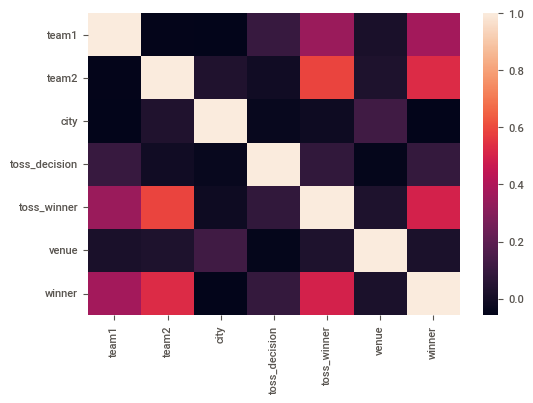

In [135]:
#CORRELLATION AFTER FEATURE ENGINEERING

sns.heatmap(traindata.corr())

In [51]:
#USING THE LABEL ENCODING TECHNIQUE

import sklearn.preprocessing as skl
data2 = pd.DataFrame(traindata)
var = ['city','toss_decision','venue','winner']
enc = skl.LabelEncoder()
for i in var:
    data2[i] = enc.fit_transform(data2[i])

In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   team1          756 non-null    int64
 1   team2          756 non-null    int64
 2   city           756 non-null    int64
 3   toss_decision  756 non-null    int64
 4   toss_winner    756 non-null    int64
 5   venue          756 non-null    int64
 6   winner         756 non-null    int64
dtypes: int64(7)
memory usage: 41.5 KB


In [95]:
#DECLARING THE INDEPENDENT AND DEPENDENT VARIABLES AND STANDARDISING THE DATA

X=data2[['team1','team2','city','venue']]
y=data2['winner']
sc=skl.StandardScaler()
X=sc.fit_transform(X)

In [138]:
#CHECKING ACCURACY OF THE VARIOUS MODELS

from sklearn.ensemble import RandomForestClassifier
Random_model2 = RandomForestClassifier()
Random_model2.fit(X,y)
print("Random Forest Classifier accuracy: ", (Random_model.score(X,y))*100)

Random Forest Classifier accuracy:  82.14285714285714


In [102]:
#CHECKING ACCURACY OF THE VARIOUS MODELS

from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=390, learning_rate=0.1)
xgb_model.fit(X,y)
print("XGBoost Classifier accuracy: ", (xgb_model.score(X,y))*100)

XGBoost Classifier accuracy:  82.14285714285714


In [103]:
#CHECKING ACCURACY OF THE VARIOUS MODELS

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X,y)
print("KNN Classifier accuracy", (knn_model.score(X,y))*100)

KNN Classifier accuracy 62.03703703703704


In [104]:
#CHECKING ACCURACY OF THE VARIOUS MODELS

from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X,y)
print("Gaussion Navie Bayes accuracy: " ,(NB_model.score(X,y))*100)

Gaussion Navie Bayes accuracy:  36.507936507936506


In [105]:
#CHECKING ACCURACY OF THE VARIOUS MODELS

from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier()
decision_model.fit(X,y)
print("Decision Tree Classifier accuracy: ", (decision_model.score(X,y))*100)

Decision Tree Classifier accuracy:  82.14285714285714


In [106]:
#CHECKING ACCURACY OF THE VARIOUS MODELS

from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X,y)
print("SVM accuracy: ", (svm_model.score(X,y))*100)

SVM accuracy:  50.661375661375665


In [107]:
#APPLYING LABEL ENCODING

mat_data = pd.read_csv('matches.csv')
encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12}}
mat_data.replace(encode,inplace=True)
var_mod = ['venue']
enc = LabelEncoder()
for i in var_mod:
    mat_data[i] = enc.fit_transform(mat_data[i])

In [152]:
#PREPARING THE DATA FOR MODEL BY USING TRAIN_TEST_SPLIT (MODEL USING RANDOM FOREST)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
y_pred=Random_model.predict(X_test)
y_pred

array([ 7,  0,  1,  3,  6, 10,  1,  3,  4,  2,  3,  3,  7,  2,  1,  1,  1,
        6,  0,  1,  5,  5,  7,  4,  3,  1,  7,  2,  6,  5,  6,  3,  2,  5,
        3,  2,  4,  0,  7,  7,  3,  7,  4,  3,  1,  3,  3,  7,  7,  5,  4,
        2,  3,  7,  3,  7,  0,  9,  0,  2,  5,  1,  0,  0,  4,  4,  1,  6,
        1,  0,  0,  4,  1,  2,  1,  5,  6, 11,  0,  1,  6,  3,  0,  1,  4,
        0,  3,  3,  3,  7,  0,  3,  3,  2,  5,  0,  5,  5,  3,  1,  1,  0,
        1,  6, 10,  7,  0,  1,  7,  6,  1,  5,  0,  1,  6,  1,  5,  3,  3,
        3,  7,  3,  0,  4,  0, 10,  5,  7,  2,  4,  7,  6,  5,  3,  1,  3,
        2,  1,  2,  8,  2,  0,  4,  3,  3,  3,  7,  6,  2,  9,  6,  2,  2,
        4,  2,  0,  4,  5,  2,  6,  3,  2,  3,  0,  2,  1,  0,  4,  6,  0,
        5,  6,  6,  6,  4,  2,  4,  7,  5,  5,  4,  2,  4,  1,  2,  2,  7,
        0,  2])

In [158]:
#CHECKING THE ACCURACY OF OUR MODEL (RANDOM FOREST)

from sklearn.metrics import accuracy_score
print("accuracy of the model USING RANDOM FOREST: ", accuracy_score(y_test, Random_model.predict(X_test))*100)

accuracy of the model USING RANDOM FOREST:  86.77248677248677


In [153]:
#CHECKING THE R2 SCORE

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100
score

70.67131284718675

In [148]:
#MODEL USING DECISION TREE

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
y_pred=decision_model.predict(X_test)
y_pred

array([ 7,  0,  1,  3,  5, 10,  1,  3,  4,  2,  3,  3,  7,  2,  1,  1,  1,
        6,  0,  1,  5,  5,  7,  4,  3,  1,  7,  2,  6,  5,  6,  3,  2,  5,
        3,  2,  4,  0,  7,  7,  3,  7,  4,  3,  1,  3,  3,  7,  7,  5,  4,
        0,  3,  7,  3,  7,  0,  9,  0,  2,  5,  1,  0,  0,  4,  4,  1,  6,
        1,  0,  0,  4,  1,  2,  1,  5,  6, 11,  0,  1,  6,  3,  0,  1,  4,
        0,  3,  3,  3,  7,  0,  3,  3,  2,  5,  0,  4,  5,  3,  1,  1,  0,
        1,  6, 10,  7,  0,  1,  7,  6,  1,  5,  0,  1,  6,  1,  5,  3,  3,
        2,  7,  3,  0,  4,  0, 10,  5,  7,  2,  4,  7,  6,  5,  3,  1,  3,
        2,  1,  2,  8,  2,  0,  3,  3,  3,  3,  7,  6,  2,  9,  5,  2,  2,
        4,  2,  0,  4,  5,  0,  6,  3,  2,  3,  0,  2,  1,  0,  4,  6,  0,
        5,  6,  6,  6,  4,  2,  4,  7,  5,  5,  1,  2,  4,  1,  2,  2,  7,
        0,  2])

In [160]:
#CHECKING THE ACCURACY OF OUR MODEL (DECISION TREE)

from sklearn.metrics import accuracy_score
print("accuracy of the model USING DECISION TREE: ", accuracy_score(y_test, decision_model.predict(X_test))*100)

accuracy of the model USING DECISION TREE:  85.71428571428571


In [154]:
#CHECKING THE R2 SCORE

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100
score

70.67131284718675

In [156]:
#MODEL USING XGBOOST

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
y_pred=xgb_model.predict(X_test)
y_pred

array([ 7,  0,  1,  3,  5, 10,  1,  3,  4,  2,  3,  3,  7,  2,  1,  1,  1,
        6,  0,  1,  5,  5,  7,  4,  3,  1,  7,  2,  6,  5,  6,  3,  2,  5,
        3,  2,  4,  0,  7,  7,  3,  7,  4,  3,  1,  3,  3,  7,  7,  5,  4,
        0,  3,  7,  3,  7,  0,  9,  0,  2,  5,  1,  0,  0,  4,  4,  1,  6,
        1,  0,  0,  6,  1,  2,  1,  5,  6, 11,  0,  1,  6,  3,  0,  1,  4,
        0,  3,  3,  3,  7,  0,  3,  3,  2,  5,  0,  5,  5,  3,  1,  1,  0,
        1,  6, 10,  7,  0,  1,  7,  6,  1,  5,  0,  1,  6,  1,  5,  3,  3,
        3,  7,  3,  0,  4,  0, 10,  5,  7,  2,  4,  7,  6,  5,  3,  1,  3,
        2,  1,  2,  8,  2,  0,  3,  3,  3,  3,  7,  6,  3,  9,  5,  2,  2,
        4,  2,  0,  4,  5,  0,  6,  3,  2,  3,  0,  2,  1,  0,  4,  6,  0,
        5,  6,  6,  6,  4,  2,  4,  7,  5,  5,  4,  2,  4,  1,  2,  2,  7,
        0,  2])

In [161]:
#CHECKING THE ACCURACY OF OUR MODEL (XGBOOST)

from sklearn.metrics import accuracy_score
print("accuracy of the model XGBOOST: ", accuracy_score(y_test, xgb_model.predict(X_test))*100)

accuracy of the model XGBOOST:  86.24338624338624
